In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

%run proj1_helpers.py
%run implementations.py

In [2]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# pre pre processing, log of exponential data,augmentation by adding ones.
x = np.where(x==-999, np.nan, x)
cols = [0, 1, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
x[:, cols] = np.log1p(x[:, cols])

D:\programs\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [4]:
x = np.delete(x, [15, 18, 20, 25, 28], axis = 1)

"y=1" ratio of y: 0.342668


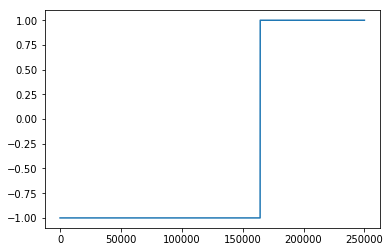

In [5]:
print('"y=1" ratio of y: '+str(np.sum(y==1)/len(y)))
plt.plot(np.sort(y))

In [6]:
rows0 = x[:,19]==0
rows1 = x[:,19]==1
rows2 = np.logical_or(x[:,19]==2, x[:,19]==3)

In [7]:
y0, x0 = y[rows0], x[np.where(rows0)]
y1, x1 = y[rows1], x[np.where(rows1)]
y2, x2 = y[rows2], x[np.where(rows2)]

In [8]:
x0[:,19] = 1

In [9]:
def remove_nancols(x):
    nancols = np.all(np.isnan(x), axis=0)
    x = x[:,~nancols]
    return x

In [10]:
x0 = remove_nancols(x0)
x1 = remove_nancols(x1)
x2 = remove_nancols(x2)

In [11]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(99913, 17)
(77544, 19)
(72543, 25)


In [12]:
# set median in first column
def set_median(x):
    median = np.nanmedian(x, axis=0)
    inds_nan = np.isnan(x)
    x[inds_nan] = median
    return x

In [13]:
x0[:,0] = set_median(x0[:,0])
x1[:,0] = set_median(x1[:,0])
x2[:,0] = set_median(x2[:,0])

In [14]:
x0, mean_x0, std_x0 = standardize(x0)
x1, mean_x1, std_x1 = standardize(x1)
x2, mean_x2, std_x2 = standardize(x2)

C:\Users\NathanSennesael\Desktop\lkl\ML\proj1_helpers.py:62: RuntimeWarning: invalid value encountered in true_divide
  x = x / std_x


In [15]:
x0 = remove_nancols(x0)
x1 = remove_nancols(x1)

x0 = np.insert(x0, 0, 1, axis=1)
x1 = np.insert(x1, 0, 1, axis=1)
x2 = np.insert(x2, 0, 1, axis=1)

In [16]:
ratio = 0.99
x0, y0, x0_test, y0_test = split_data(x0, y0, ratio, seed=1)
x1, y1, x1_test, y1_test = split_data(x1, y1, ratio, seed=1)
x2, y2, x2_test, y2_test = split_data(x2, y2, ratio, seed=1)

## Let'sSeeeeee

In [17]:
def Poly_Neural_Net(y_train, x_train,y_test, x_test, degree, eps):
    # define lists to store the loss of training data and test data
    
    phi_x_train = build_poly(x_train, degree)
    phi_x_test = build_poly(x_test, degree)
    y_train = np.where(y_train==-1, 0, y_train)
    y_test = np.where(y_test==-1, 0, y_test)
        
    labels = [0, 1]
    layer_array = [[len(labels), 'sigmoid']]
    input_dims = phi_x_train.shape[1]
    neural_net = create_neural_network(layer_array, input_dims)
    neural_net = train_network(phi_x_train, y_train, labels, neural_net, epochs=eps)
    
    y_pred_train = []
    for i in range(len(y_train)):
        y_pred_train.append((predict(phi_x_train[i], neural_net))[0])
    
    y_pred_test = []
    for i in range(len(y_test)):
        y_pred_test.append((predict(phi_x_test[i], neural_net))[0])
        
    y_pred_train = np.where(y_pred_train==0, -1, y_pred_train)
    y_pred_test = np.where(y_pred_test==0, -1, y_pred_test)
    
    acc_train,_ = metrics(y_train,y_pred_train)
    acc_test,_ = metrics(y_test,y_pred_test)
    
    data = []
    data_nested = []        
        
    data_nested.append([acc_train, acc_test, degree])
    data_nested = np.array(data_nested)
    index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
    best_value = data_nested[index_best_value][0]
    print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1])
    data.append(best_value)
        
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    acc_train, acc_test = best_value[0], best_value[1]
    print("Final :: Training accuracy: ",acc_train," ,testing accuracy: ",acc_test)
    
    return degree

In [21]:
degree = 1
epochs=300

degree0 = Poly_Neural_Net(y0, x0, y0_test, x0_test, degree, epochs)

KeyboardInterrupt: 

In [ ]:
degree = 1
epochs=300

degree0 = Poly_Neural_Net(y1, x1, y1_test, x1_test, degree, epochs)

In [ ]:
degree = 1
epochs=300

degree0 = Poly_Neural_Net(y2, x2, y2_test, x2_test, degree, epochs)